In [496]:
#Importing Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.patches import Polygon

#Importing Modules
from sklearn.metrics import confusion_matrix
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, r2_score
from statistics import mean, stdev
from sklearn.metrics import classification_report, cohen_kappa_score, accuracy_score, recall_score, f1_score, precision_score

In [497]:
#changing the width for a more natural view

pd.set_option('display.width', 900)

In [498]:
# In this section, I will predict the quality of the wines with different ML model

# 1st - We still start by loading the white wine dataset here and cleaning the columns
w_wine = pd.read_csv("/Users/CAB Projects/1_My Projects/4_BlueBerry Winery/Data Set/winequality-white.csv", sep=";")

print(w_wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6


In [499]:
# following common data science pratice and changing the coloumn nacmes

w_wine.columns = w_wine.columns.str.replace(' ', '_')
w_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

In [500]:
#Now we will split the dataset into two: one with 3 quality labels and the other with 4 quality labels

# This dataset will be transformed to include 3 quality labels
ww_3ql = w_wine.copy()

# This dataset will be transformed to include 4 quality labels
ww_4ql = w_wine.copy()

display(ww_3ql.head(5), ww_4ql.head(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [501]:
# Now I create a new column called "quality_label", define 3 ranges and associate each range with a label
ww_3ql["quality_label"] = ww_3ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value <= 7 else "high")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
ww_3ql["quality_label"] = pd.Categorical(ww_3ql["quality_label"], 
categories = ["low", "medium", "high"])

display(ww_3ql.head(5), ww_3ql.tail(5))

#check the dataset basic stats
display(ww_3ql.info())
display(ww_3ql.describe())


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         4898 non-null   float64 
 1   volatile_acidity      4898 non-null   float64 
 2   citric_acid           4898 non-null   float64 
 3   residual_sugar        4898 non-null   float64 
 4   chlorides             4898 non-null   float64 
 5   free_sulfur_dioxide   4898 non-null   float64 
 6   total_sulfur_dioxide  4898 non-null   float64 
 7   density               4898 non-null   float64 
 8   pH                    4898 non-null   float64 
 9   sulphates             4898 non-null   float64 
 10  alcohol               4898 non-null   float64 
 11  quality               4898 non-null   int64   
 12  quality_label         4898 non-null   category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


None

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [502]:
# Now I create a new column called "quality_label", define 4 ranges and associate each range with a label
ww_4ql["quality_label"] = ww_4ql["quality"].apply(lambda value: "low" if value <= 5 else "medium" if value == 6 else "high" if value == 7 else "premium")

# now, I transform these labels into categorical data types (specific to pandas) instead of simple string
ww_4ql["quality_label"] = pd.Categorical(ww_4ql["quality_label"], 
categories = ["low", "medium", "high", "premium"])

#lets check our new dataset 
display(ww_4ql.head(5), ww_4ql.tail(5))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,high
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,medium


In [503]:
# Now I compare the frequency of the different qualities of wines in the different datasets
display("Quality distribution - 3labels", pd.DataFrame(ww_3ql["quality_label"].value_counts()).sort_index())

# let's check how many premium wines we actually have in the dataset
display("Quality distribution 4 labels", pd.DataFrame(ww_4ql["quality_label"].value_counts()).sort_index())

# based on the results below a grouping of the different qualities with 4 labels allows us to split the samples in a more evenly distributed way.

'Quality distribution - 3labels'

,quality_label
low,1640
medium,3078
high,180


'Quality distribution 4 labels'

,quality_label
low,1640
medium,2198
high,880
premium,180


In [504]:
# checking if the below formula produces labels for labeling pie and bar chart automatically
labels_3 = ww_3ql["quality_label"].cat.categories
labels_3

Index(['low', 'medium', 'high'], dtype='object')

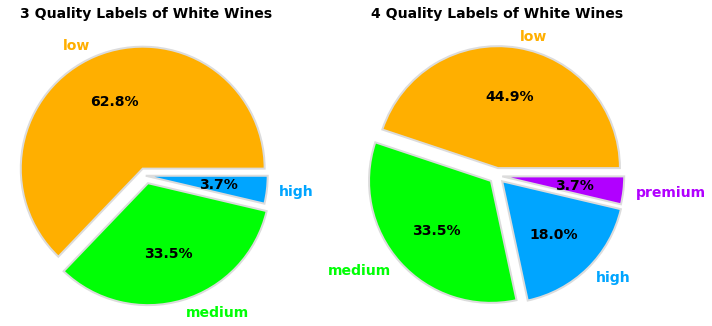

In [505]:
# Now I compare the frequency of the different qualities of wines in the different datasets in a pie chart
fig, axs = plt.subplots(nrows=1, ncols=2, figsize= (10,10))
colors = plt.get_cmap("gist_rainbow")(np.linspace(0.16, 0.895, len(ww_4ql["quality_label"].value_counts())))
labels_3 = ww_3ql["quality_label"].cat.categories
labels_4 = ww_4ql["quality_label"].cat.categories


patches, texts, pcts = axs[0].pie(ww_3ql["quality_label"].value_counts(),
                        labels= labels_3,
                        colors=colors, 
                        explode= (0.07, 0.07, 0.0), 
                        autopct='%1.1f%%', 
                        radius=1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

patches, texts, pcts = axs[1].pie(ww_4ql["quality_label"].value_counts(), 
                        labels= labels_4, 
                        colors=colors, 
                        explode= (0.07, 0.07, 0.07, 0.05), 
                        autopct='%1.1f%%', 
                        radius= 1.1,
                        wedgeprops= {"linewidth": 2, "edgecolor": "gainsboro"},
                        textprops= {"size": 14, "fontweight":"bold", "color": "black"})

for i, patch in enumerate (patches):
        texts[i].set_color(patch.get_facecolor())

axs[0].set_title("3 Quality Labels of White Wines",{"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)
axs[1].set_title("4 Quality Labels of White Wines", {"size": 14, "fontweight":'bold', "color": "black"}, loc= "center", pad= 20)

plt.tight_layout()

,3labels,4labels
,Frequency,Frequency
quality_label,,
low,1640.0,1640
medium,3078.0,2198
high,180.0,880
premium,NaN,180


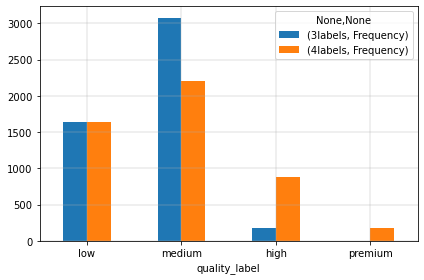

In [506]:
# let's create a single dataframe with the value counts and a bar chart for visualisation
ww_3ql_count = pd.DataFrame(ww_3ql["quality_label"].value_counts().sort_index().rename_axis("quality_label").reset_index(name="Frequency").set_index("quality_label"))
ww_4ql_count = pd.DataFrame(ww_4ql["quality_label"].value_counts().sort_index().rename_axis("quality_label").reset_index(name="Frequency").set_index("quality_label")) 
ql_count = pd.concat([ww_3ql_count, ww_4ql_count], axis=1, keys=["3labels", "4labels"])

display(ql_count) 

ql_count.plot.bar()
plt.xticks(rotation=0)
plt.grid(True, linewidth=0.4)
plt.tight_layout()

In [507]:
ww_3ql.iloc[:,:-1].head(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


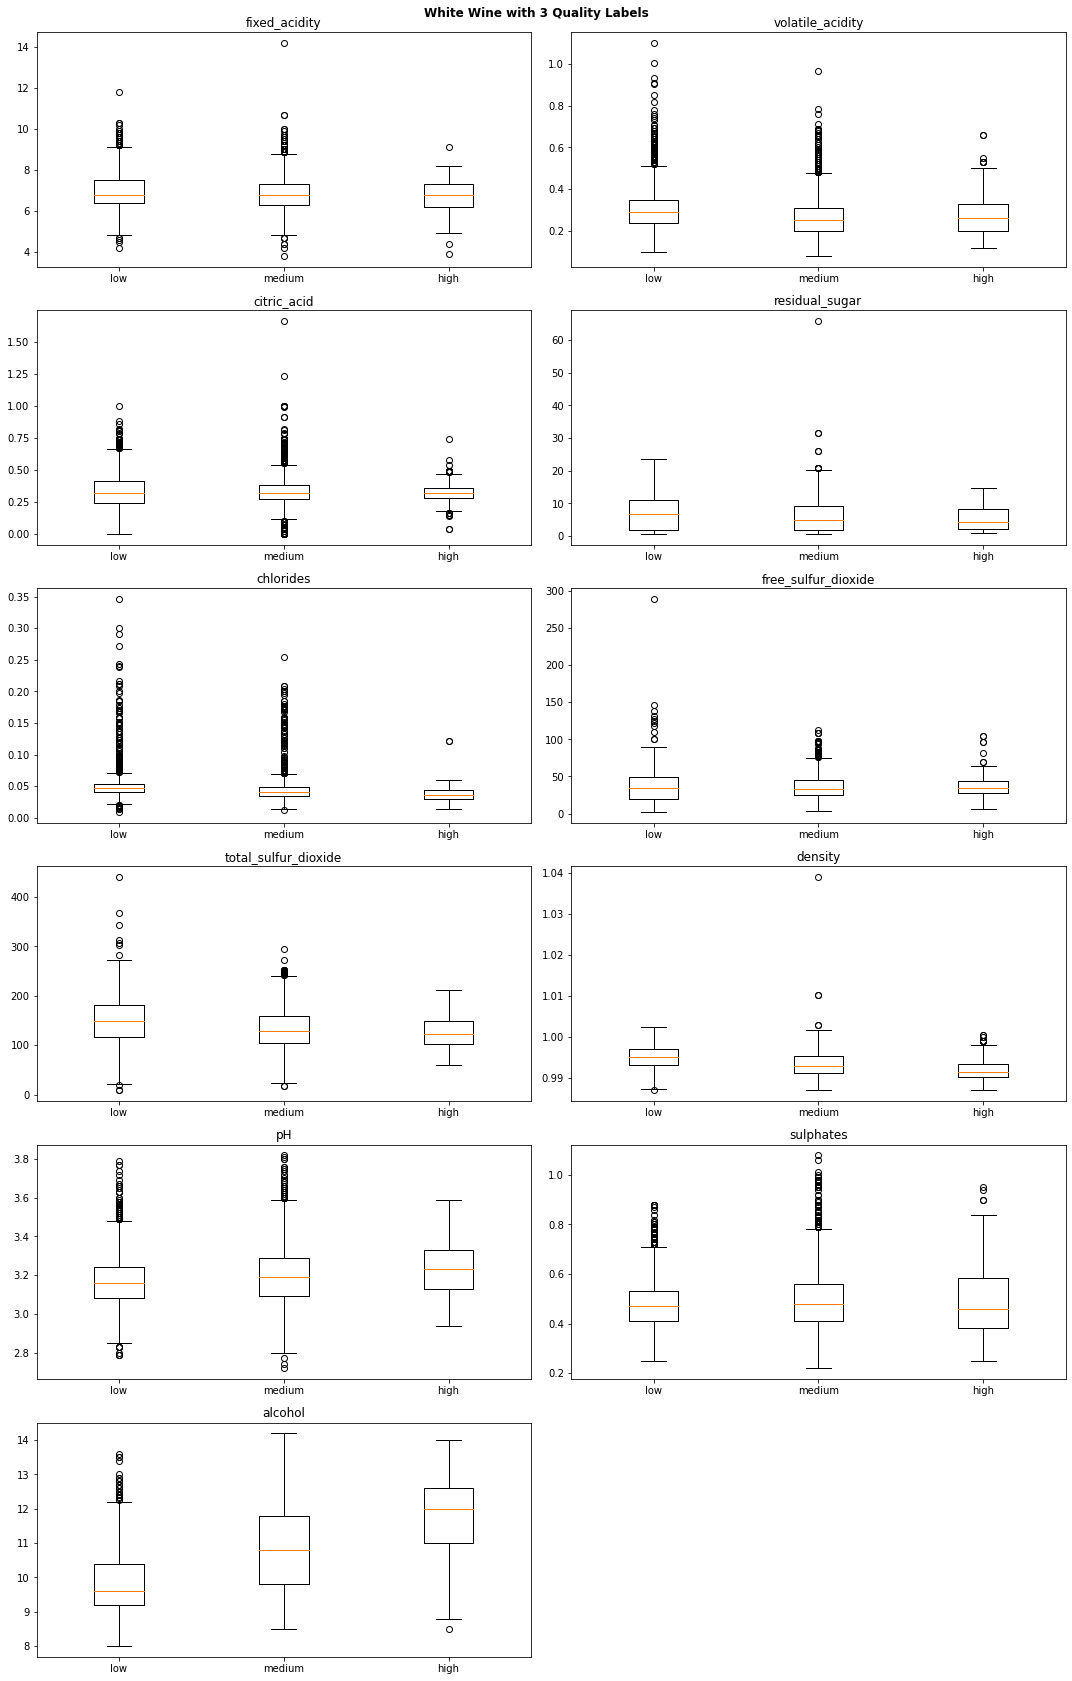

In [508]:
# Now we check for outliers in the different quality groups 

# First, using scatterplots for 3 labeled data:
count = 1
plt.figure(figsize= (15,35))
plt.suptitle("White Wine with 3 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]


for col in ww_3ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    bplot= plt.boxplot((
        ww_3ql[ww_3ql["quality_label"] == "low"][col],
        ww_3ql[ww_3ql["quality_label"] == "medium"][col],
        ww_3ql[ww_3ql["quality_label"] == "high"][col]),
        labels= labels_3
        )
    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

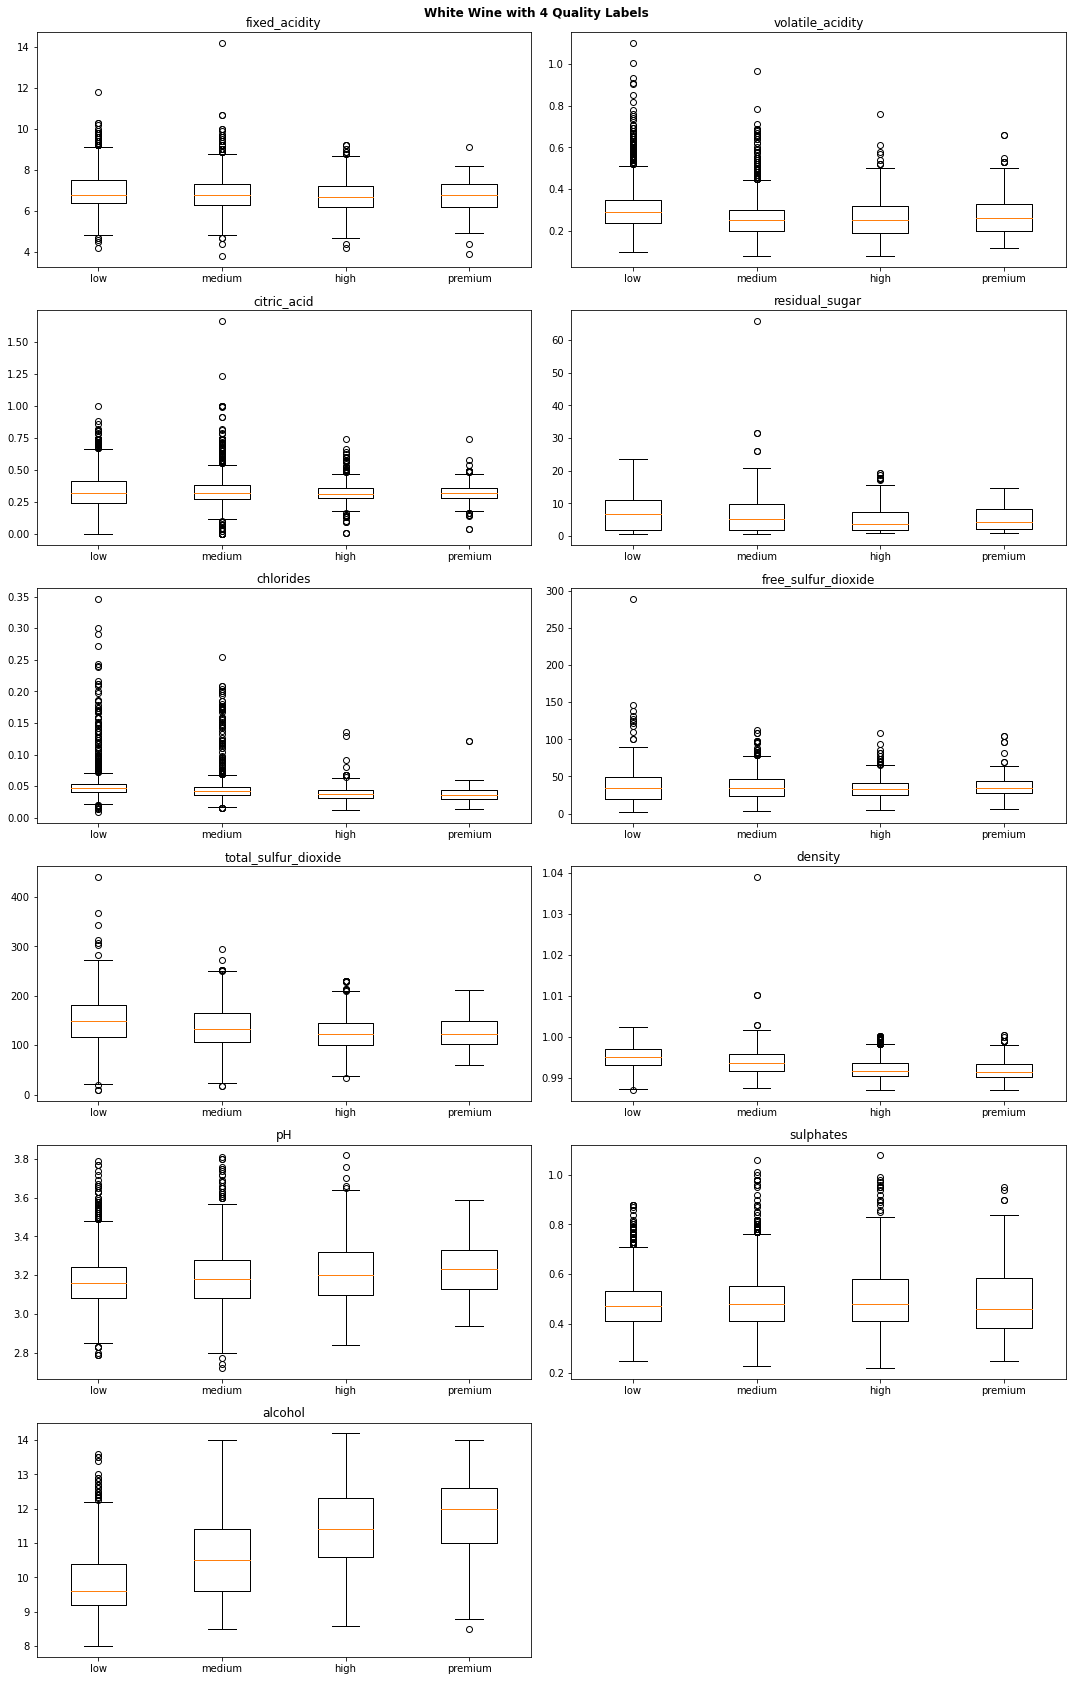

In [509]:
# Now we check for outliers in the different quality groups 

# First, using scatterplots for 4 labeled data:
count = 1
plt.figure(figsize= (15,35))
plt.suptitle("White Wine with 4 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]


for col in ww_4ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    bplot= plt.boxplot((
        ww_4ql[ww_4ql["quality_label"] == "low"][col],
        ww_4ql[ww_4ql["quality_label"] == "medium"][col],
        ww_4ql[ww_4ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "premium"][col]),
        labels= labels_4
        )
    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

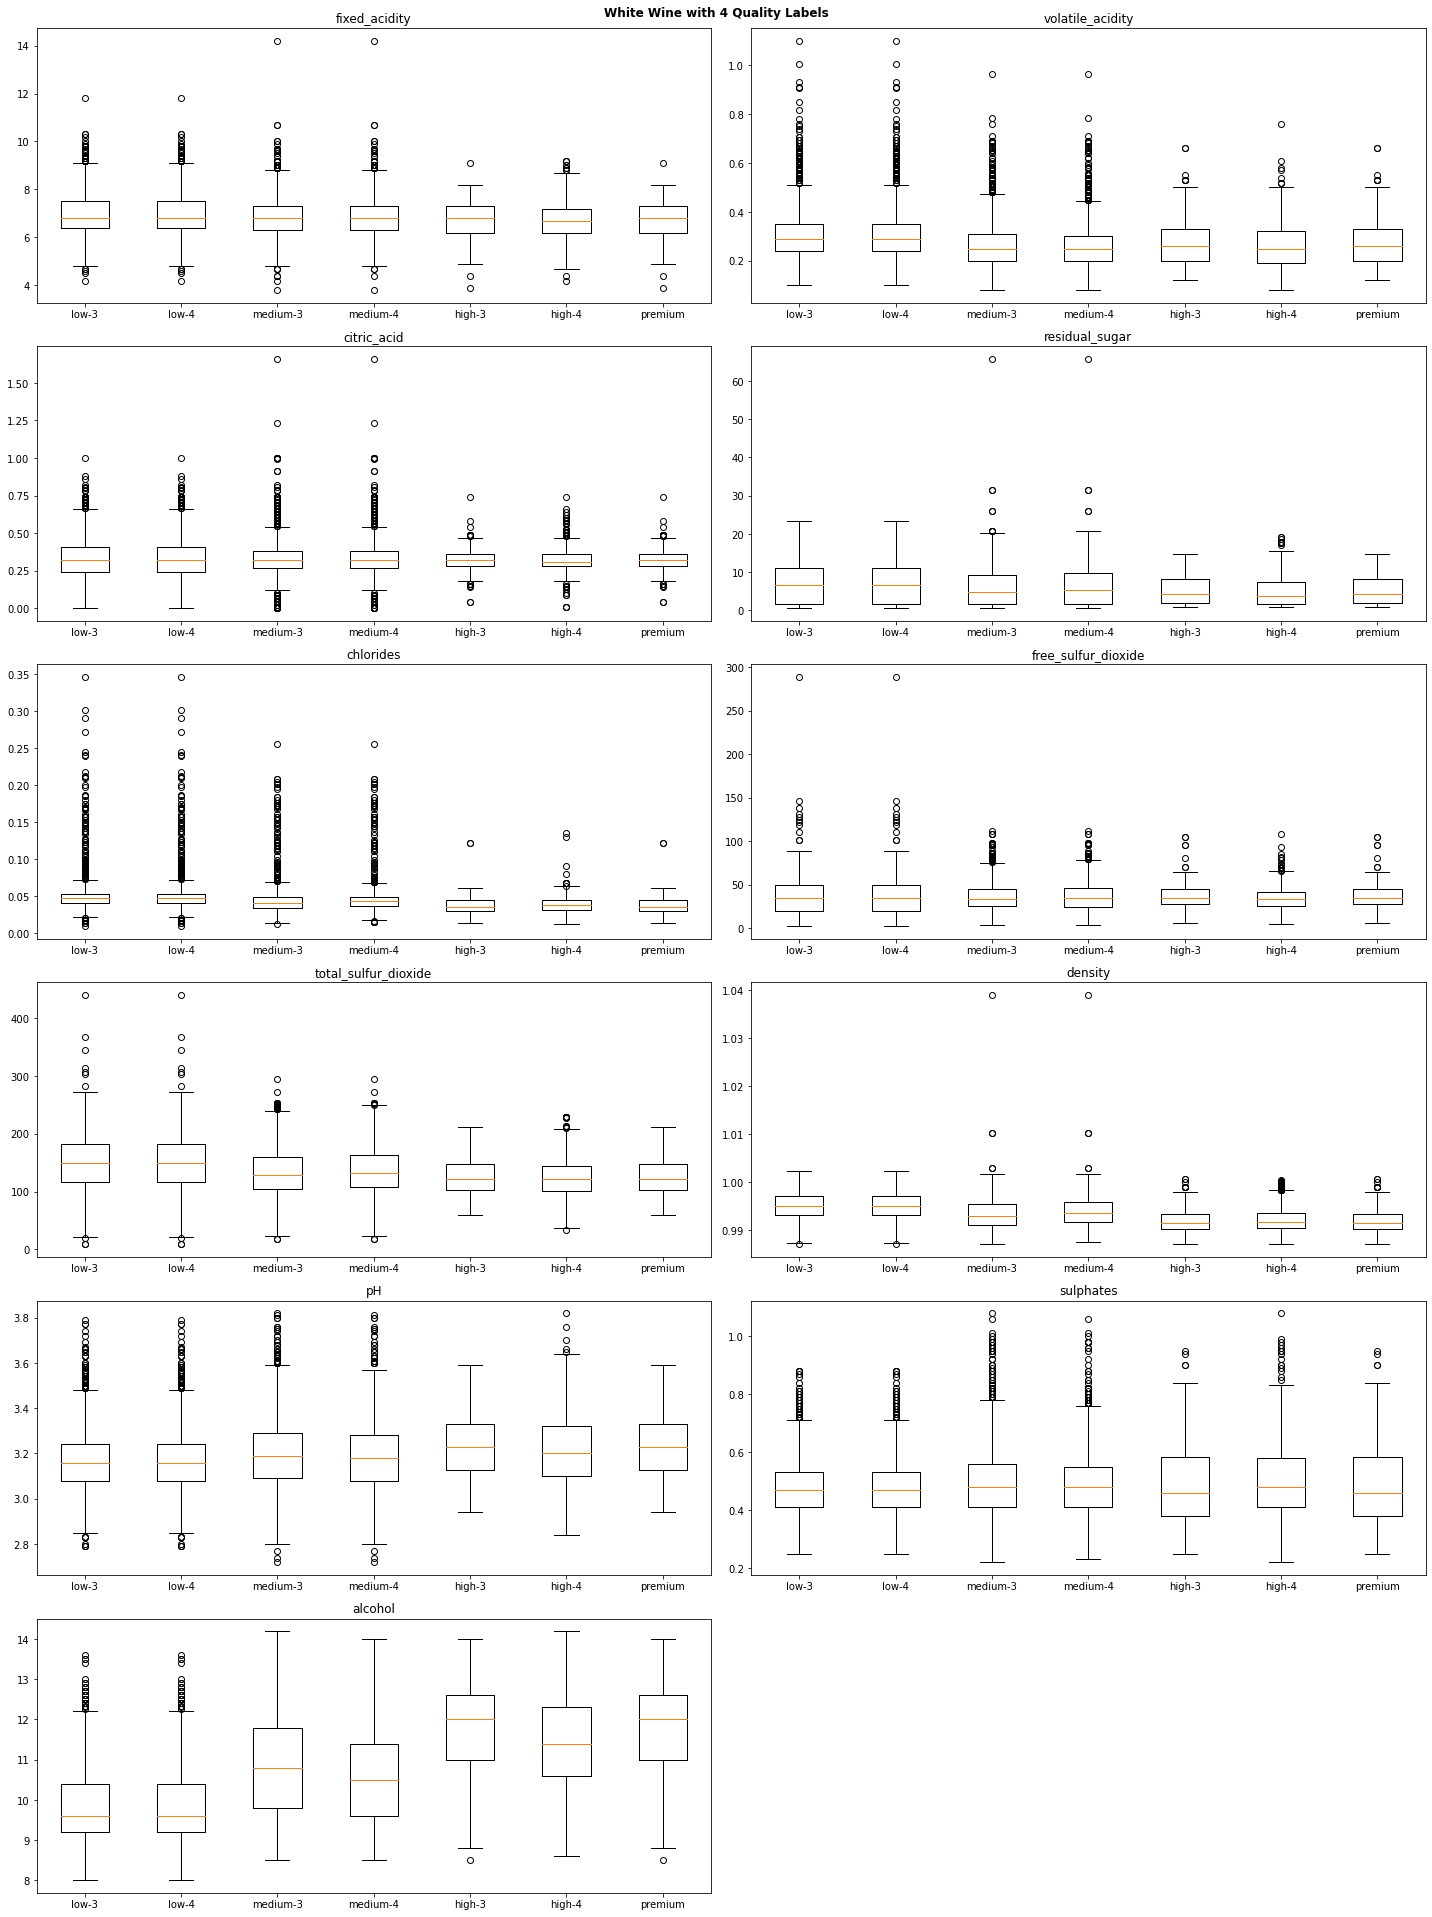

In [533]:
# Now we check for outliers in the different quality groups next to each other

# First, using scatterplots for 4 labeled data:
count = 1
plt.figure(figsize= (20,40))
plt.suptitle("White Wine with 4 Quality Labels", weight= "demibold", x=0.5, y=0.99)
colors = ["CadetBlue", "Gold", "LimeGreen"]
labels_5 = ['low-3','low-4', 'medium-3','medium-4', 'high-3','high-4', "premium"]

for col in ww_4ql.iloc[:,:-2]:
    plt.subplot(9,2,count)
    plt.boxplot((
        ww_3ql[ww_3ql["quality_label"] == "low"][col],
        ww_4ql[ww_4ql["quality_label"] == "low"][col],
        ww_3ql[ww_3ql["quality_label"] == "medium"][col],
        ww_4ql[ww_4ql["quality_label"] == "medium"][col],
        ww_3ql[ww_3ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "high"][col],
        ww_4ql[ww_4ql["quality_label"] == "premium"][col]),
        labels=labels_5)

    plt.title(col, {"size": 12, "fontweight":'medium', "color": "black"})
    count+=1

plt.tight_layout()

In [536]:
ww_3ql.iloc[:,:-1].head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [537]:
# Now the statistics show begins :D

# applying ANOVA to prove if mean alcohol level vary significantly among the low quality, medium quality and high quality wines?

for (X) in ww_3ql.iloc[:,:-2]:
    F, p = stats.f_oneway(ww_3ql[ww_3ql['quality_label'] == 'low'][X],
    ww_3ql[ww_3ql['quality_label'] == 'medium'][X],
    ww_3ql[ww_3ql['quality_label'] == 'high'][X])
    print("ANOVA test for mean", X, "across all wines with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 21.923026494425756 	p-value: 3.321537387880916e-10 

ANOVA test for mean volatile_acidity across all wines with different quality ratings
F Statistic: 133.6668084396585 	p-value: 3.012823078922054e-57 

ANOVA test for mean citric_acid across all wines with different quality ratings
F Statistic: 0.23254245986965996 	p-value: 0.7925248530727159 

ANOVA test for mean residual_sugar across all wines with different quality ratings
F Statistic: 21.934773835107606 	p-value: 3.2830889157949124e-10 

ANOVA test for mean chlorides across all wines with different quality ratings
F Statistic: 90.87064418602546 	p-value: 1.7797433543986758e-39 

ANOVA test for mean free_sulfur_dioxide across all wines with different quality ratings
F Statistic: 0.5909833608324854 	p-value: 0.5538219567015075 

ANOVA test for mean total_sulfur_dioxide across all wines with different quality ratings
F Statistic: 76.66028143

In [539]:
for (X) in ww_4ql.iloc[:,:-2]:
    F, p = stats.f_oneway(
        ww_4ql[ww_4ql['quality_label'] == 'low'][X],
        ww_4ql[ww_4ql['quality_label'] == 'medium'][X],
        ww_4ql[ww_4ql['quality_label'] == 'high'][X],
        ww_4ql[ww_4ql['quality_label'] == 'premium'][X])
    print("ANOVA test for mean", X, "across all wines with different quality ratings")
    print('F Statistic:', F, '\tp-value:', p, "\n")

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 17.790562174947635 	p-value: 1.755691967989088e-11 

ANOVA test for mean volatile_acidity across all wines with different quality ratings
F Statistic: 89.20422115904348 	p-value: 3.370028555771532e-56 

ANOVA test for mean citric_acid across all wines with different quality ratings
F Statistic: 2.356332980607983 	p-value: 0.06986638384671134 

ANOVA test for mean residual_sugar across all wines with different quality ratings
F Statistic: 27.774541837997024 	p-value: 8.368534159597376e-18 

ANOVA test for mean chlorides across all wines with different quality ratings
F Statistic: 84.18385157999884 	p-value: 4.180546165598879e-53 

ANOVA test for mean free_sulfur_dioxide across all wines with different quality ratings
F Statistic: 2.0796966268458466 	p-value: 0.10068700914283754 

ANOVA test for mean total_sulfur_dioxide across all wines with different quality ratings
F Statistic: 68.8352682588

ANOVA test for mean fixed_acidity across all wines with different quality ratings
F Statistic: 17.790562174947635 	p-value: 1.755691967989088e-11 



TypeError: list indices must be integers or slices, not str